# Machine Learning on Histopathological Dataset for Breast Cancer
Dataset from [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection/data)

## Getting dataset from google drive


Uploaded dataset at [Google Drive](https://drive.google.com/open?id=18YKz4OtbmQ0hZC67lOcoJ4mxR1liT4hu)

### Mounting Google drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Extracting data from drive

In [0]:
import zipfile

zip_dir = '/content/drive/My Drive/Datasets/histopathologic-cancer-detection.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp/histo/')
zip_ref.close()

### Rearranging data and directories


In [0]:
train_zip_dir = '/tmp/histo/train.zip'
test_zip_dir = '/tmp/histo/test.zip'

train_zip_ref = zipfile.ZipFile(train_zip_dir, 'r')
train_zip_ref.extractall('/tmp/histo/train/')
train_zip_ref.close()

test_zip_ref = zipfile.ZipFile(test_zip_dir, 'r')
test_zip_ref.extractall('/tmp/histo/test/')
test_zip_ref.close()

In [0]:
!rm /tmp/histo/test.zip
!rm /tmp/histo/train.zip

Read the tabel of labelled filenames

In [5]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

histo_dataframe = pd.read_csv('/tmp/histo/train_labels.csv')

histo_dataframe = histo_dataframe.reindex(
    np.random.permutation(histo_dataframe.index))
histo_dataframe

,id,label
38592,326ffd2f9215adb9f65983726b75349d5122dfad,1
40203,c6965113800665a7fd487195e9411ebccf5ae94d,0
139706,fc1b8f0d6496bc72d8f3d96836390950f28f469d,1
124840,441bdba07793444d7dd9fb1c1be232fa171301ab,0
153873,ac9f68102be24473fec2a3139edcd21c07d52b7a,0
...,...,...
180899,9cb9a59df305d6092e527dd296a3f3b43af90f02,0
79204,0024ef3c0b4953c4d32be6e30c23c4b4786556c7,0
72013,ffa68c28439898e8234b36fb7673f113e78d693b,0
214569,7225105056adeffc2a68654ec30ecd90cdb0bdc0,1


Getting split lengths for training data for 70-30 train-val splits

In [0]:
train_percentage = 70.0
total_len = len(histo_dataframe)
train_len = int(total_len * 0.7)
val_len = total_len - train_len

In [0]:
train_benign_names = list()
train_malignant_names = list()
for i in histo_dataframe.head(train_len).index:
  if (histo_dataframe['label'][i] == 0):
    train_benign_names.append(histo_dataframe['id'][i] + ".tif")
  else: 
    train_malignant_names.append(histo_dataframe['id'][i] + ".tif")


val_benign_names = list()
val_malignant_names = list()
for i in histo_dataframe.tail(val_len).index:
  if (histo_dataframe['label'][i] == 0):
    val_benign_names.append(histo_dataframe['id'][i] + ".tif")
  else: 
    val_malignant_names.append(histo_dataframe['id'][i] + ".tif")

move around the files in the right order

In [0]:
!mkdir /tmp/histo/train/train/
!mkdir /tmp/histo/train/train/benign/
!mkdir /tmp/histo/train/train/malignant/

!mkdir /tmp/histo/train/val/
!mkdir /tmp/histo/train/val/benign/
!mkdir /tmp/histo/train/val/malignant/

move data from extracted directory into designated directories

In [0]:
import os

base_dir = '/tmp/histo/train'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

val_benign_dir = os.path.join(val_dir, 'benign')
val_malignant_dir = os.path.join(val_dir, 'malignant')

for fname in train_benign_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(train_benign_dir, fname))

for fname in train_malignant_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(train_malignant_dir, fname))

for fname in val_benign_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(val_benign_dir, fname))

for fname in val_malignant_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(val_malignant_dir, fname))

## Displaying some slices

Benign


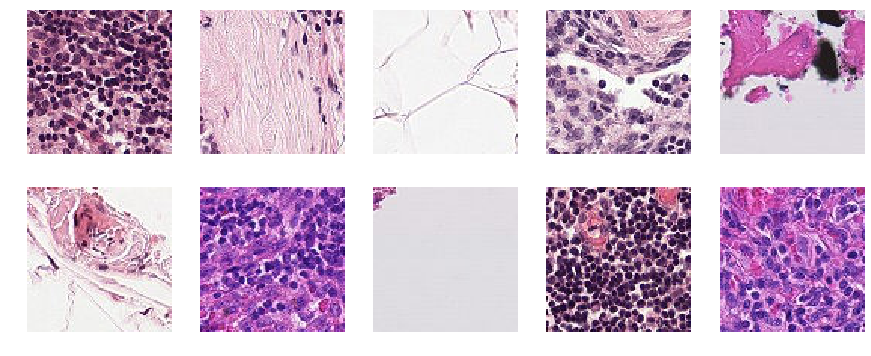

Malignant


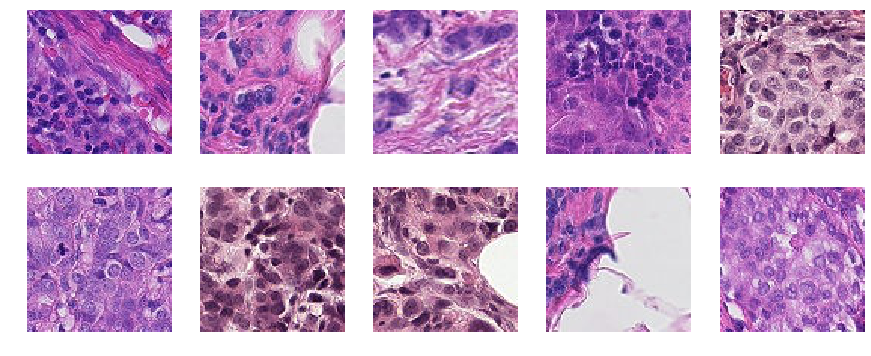

In [10]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

images_per_class = 10

print("Benign")

plt.figure(figsize=(15,6))
for i in range(1, images_per_class + 1):
  plt.subplot(2, 5, i)
  plt.axis('off')
  selected_img = np.random.choice(os.listdir(val_benign_dir))
  plt.imshow(mpimg.imread(os.path.join(val_benign_dir, selected_img)))

plt.show()
print("Malignant")

plt.figure(figsize=(15,6))
for i in range(1, images_per_class + 1):
  plt.subplot(2, 5, i)
  plt.axis('off')
  selected_img = np.random.choice(os.listdir(val_malignant_dir))
  plt.imshow(mpimg.imread(os.path.join(val_malignant_dir, selected_img)))

## Preprocessing and Loading data

Creating data generators for easy augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add augmentation over here
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary')



Found 154017 images belonging to 2 classes.
Found 66008 images belonging to 2 classes.


# Standard (In Progress: Model tweaking)

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adagrad, SGD

In [0]:
def get_training_metrics(train_split_percentage, history, optimizer,learning_rate, steps_per_epoch, total_epochs, validation_steps, batch_size, print_table_header = False):
  """Gets the model metrics in a documentable format
  Args:
    train_split_percentage: `int` for the percentage of the dataset allocated to print
    model: `Model` object containing the trained model
    history: `History` object containing the training history
    optimzer: `optimizer` object for tensorflow used for optimization during training
    learning_rate: `float` for the learning rate
    steps_per_epoch: `int` for batches tried per one epoch
    total_epochs: `int` for total number of epochs
    batch_size: `int` for the images per batch
    print_table_header: `bool` indicating whether to print values along with the table header
  Returns:
    None
  """
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  optimizer_name = 'SGD'
  print("copy the following text to your notebook text block: ")
  if(print_table_header):
    print(">Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate")
    print(">--- | --- | --- | --- | --- | --- | ---")
  print(">%02d-%02d | %02d | %02d | %02d | %02d | %s | %f " %
        (int(train_split_percentage), (100 - int(train_split_percentage)),
         batch_size,
         total_epochs,
         steps_per_epoch,
         validation_steps,
         optimizer_name,
         learning_rate))
  
  
  print(">$Loss_{train} =  %.4f$ | | $Loss_{val} = %.4f$ |  |$Accuracy_{train} = %.4f$ | |  $Accuracy_{val} = %.4f$" % 
        (loss[-1], 
         val_loss[-1], 
         acc[-1], 
         val_acc[-1]))

In [0]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, label="Training")
  plt.plot(epochs, val_acc, label="Validation")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label="Training")
  plt.plot(epochs, val_loss, label="Validation")
  plt.title('Training and validation loss')
  plt.legend()


## Building and compiling the architecture

In [15]:
img_input = layers.Input(shape=(100, 100, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

standard_model = Model(img_input, output)

standard_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________

## Fitting data on the model

Fitting trials on rough CNN architecture: 

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 500 | 100 | Adagrad | 0.0001
>$Loss_{train} =  0.529$ | | $Loss_{val} = 8.325$ |  |$Accuracy_{train} = 0.741$ | |  $Accuracy_{val} = 0.456$
>70-30 | 30 | 30 | 500 | 250 | Adagrad | 0.0001
>$Loss_{train} =  0.546$ | | $Loss_{val} = 0.533$ |  |$Accuracy_{train} = 0.745$ | |  $Accuracy_{val} = 0.744$
>70-30 | 100 | 30 | 1600 | 250 | SGD | 0.0001
>$Loss_{train} =  9.1188$ | | $Loss_{val} = 0.4053$ |  |$Accuracy_{train} = 9.1340$ | |  $Accuracy_{val} = 0.4043$
>70-30 | 100 | 15 | 100 | 250 | ? | ? 
>$Loss_{train} =  0.629$ | | $Loss_{val} = 0.614$ |  |$Accuracy_{train} = 0.646$ | |  $Accuracy_{val} = 0.663$
>70-30 | 100 | E=20 | 100 | 600 | SGD | 0.0005
>$Loss_{train} =  0.554$ | | $Loss_{val} = 0.537$ |  |$Accuracy_{train} = 0.729$ | |  $Accuracy_{val} = 0.752$
>70-30 | 100 | 30 | 100 | 600 | SGD | 0.0001
>$Loss_{train} =  0.622$ | | $Loss_{val} = 0.613$ |  |$Accuracy_{train} = 0.636$ | |  $Accuracy_{val} = 0.605$

**Changing the architecture => Adding 2 more convolution and max pooling layers**

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 100 | 30 | 100 | 600 | SGD | 0.001
>$Loss_{train} =  0.5367$ | | $Loss_{val} = 0.5335$ |  |$Accuracy_{train} = 0.7540$ | |  $Accuracy_{val} = 0.7365$

**Changing the architecture => "Evolution"**

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 100 | 30 | 100 | 600 | SGD | 0.0001
>$Loss_{train} =  0.685$ | | $Loss_{val} = 0.686$ |  |$Accuracy_{train} = 0.601$ | |  $Accuracy_{val} = 0.596$
>70-30 | 100 | 30 | 150 | 600 | SGD | 0.0005
>$Loss_{train} =  0.672$ | | $Loss_{val} = 0.670$ |  |$Accuracy_{train} = 0.592$ | |  $Accuracy_{val} = 0.595$
>70-30 | 30 | 30 | 500 | 100 | Adagrad | 0.0001
>$Loss_{train} =  0.529$ | | $Loss_{val} = 8.325$ |  |$Accuracy_{train} = 0.741$ | |  $Accuracy_{val} = 0.456$
---






Using the following architecture for fitting:


- input_1 (InputLayer)         [(None, 100, 100, 3)]     0

- conv2d (Conv2D)              (None, 98, 98, 16)        448       
- max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0     
- conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640    
- max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
- conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496   
- max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
- conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
- max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0        
- conv2d_4 (Conv2D)            (None, 2, 2, 256)         295168  
- max_pooling2d_4 (MaxPooling2 (None, 1, 1, 256)         0       
- flatten (Flatten)            (None, 256)               0         
- dense (Dense)                (None, 256)               65792     
- dense_1 (Dense)              (None, 256)               65792    
- dropout (Dropout)            (None, 256)               0         
- dense_2 (Dense)              (None, 1)                 257      

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 20 | 100 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6659$ | | $Loss_{val} = 0.6694$ |  |$Accuracy_{train} = 0.6100$ | |  $Accuracy_{val} = 0.5967$
>70-30 | 30 | 20 | 100 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6733$ | | $Loss_{val} = 0.6681$ |  |$Accuracy_{train} = 0.5877$ | |  $Accuracy_{val} = 0.6007$

**Changing architecure**
- input_4 (InputLayer)         [(None, 100, 100, 3)]     0  
- conv2d_14 (Conv2D)           (None, 98, 98, 16)        448       
- max_pooling2d_14 (MaxPooling (None, 49, 49, 16)        0   
- conv2d_15 (Conv2D)           (None, 47, 47, 32)        4640      
- max_pooling2d_15 (MaxPooling (None, 23, 23, 32)        0 
- conv2d_16 (Conv2D)           (None, 21, 21, 64)        18496     
- max_pooling2d_16 (MaxPooling (None, 10, 10, 64)        0         
- conv2d_17 (Conv2D)           (None, 8, 8, 128)         73856     
- max_pooling2d_17 (MaxPooling (None, 4, 4, 128)         0 
- flatten_3 (Flatten)          (None, 2048)              0  
- dense_9 (Dense)              (None, 1024)              2098176   
- dense_10 (Dense)             (None, 512)               524800    
- dropout_3 (Dropout)          (None, 512)               0  
- dense_11 (Dense)             (None, 1)                 513       

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 20 | 100 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6038$ | | $Loss_{val} = 0.6039$ |  |$Accuracy_{train} = 0.6770$ | |  $Accuracy_{val} = 0.6743$
>70-30 | 30 | 20 | 100 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6713$ | | $Loss_{val} = 0.6641$ |  |$Accuracy_{train} = 0.5863$ | |  $Accuracy_{val} = 0.5998$

In [0]:
 learning_rate = 0.001
steps_per_epoch = 100
epochs = 20
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [17]:
standard_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['acc'])

history = standard_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
100/100 [==============================] - 49s 491ms/step - loss: 0.6870 - acc: 0.5367 - val_loss: 0.6756 - val_acc: 0.5998
Epoch 2/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6806 - acc: 0.5750 - val_loss: 0.6715 - val_acc: 0.5998
Epoch 3/20
100/100 [==============================] - 18s 183ms/step - loss: 0.6751 - acc: 0.5960 - val_loss: 0.6702 - val_acc: 0.5998
Epoch 4/20
100/100 [==============================] - 18s 182ms/step - loss: 0.6669 - acc: 0.6080 - val_loss: 0.6694 - val_acc: 0.5998
Epoch 5/20
100/100 [==============================] - 18s 178ms/step - loss: 0.6784 - acc: 0.5820 - val_loss: 0.6694 - val_acc: 0.5998
Epoch 6/20
100/100 [==============================] - 18s 178ms/step - loss: 0.6736 - acc: 0.5943 - val_loss: 0.6688 - val_acc: 0.5998
Epoch 7/20
100/100 [==============================] - 18s 181ms/step - loss: 0.6667 - acc: 0.607

In [18]:
get_training_metrics(
    train_split_percentage=train_percentage,
    history=history,
    optimizer=optimizer,
    learning_rate=learning_rate,
    steps_per_epoch=steps_per_epoch,
    total_epochs=epochs,
    validation_steps=validation_steps,
    batch_size=batch_size,
    print_table_header=True)


copy the following text to your notebook text block: 
>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 20 | 100 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6713$ | | $Loss_{val} = 0.6641$ |  |$Accuracy_{train} = 0.5863$ | |  $Accuracy_{val} = 0.5998$


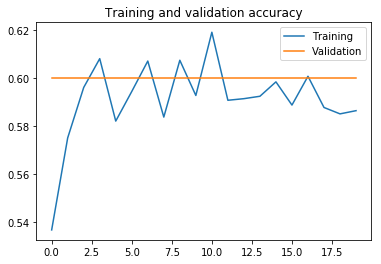

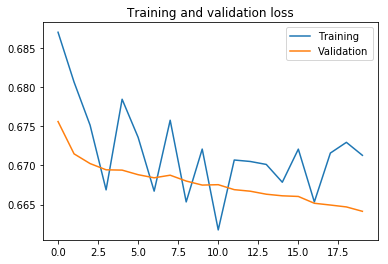

In [19]:
plot_training(history)

# Inception-V3 (Feature Extraction from the pre-trained model)


In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-09-16 19:55:11--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  60.8MB/s    in 1.4s    

2019-09-16 19:55:13 (60.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



## Setting up pretrained model

### Loading the pre-defined model architecture

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(100, 100, 3),
    include_top=False,
    weights=None)
pre_trained_model.load_weights(local_weights_file)

## Freezing and customizing the architecture

In [22]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed4')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = Model(pre_trained_model.input, x)


Last layer output shape:  (None, 4, 4, 768)


## Fitting the data on the model

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 150 | 600 | SGD | 0.000100 
>$Loss_{train} =  0.5237$ | | $Loss_{val} = 0.5109$ |  |$Accuracy_{train} = 0.7516$ | |  $Accuracy_{val} = 0.7633$
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.3810$ | | $Loss_{val} = 0.4379$ |  |$Accuracy_{train} = 0.8302$ | |  $Accuracy_{val} = 0.7969$
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.3761$ | | $Loss_{val} = 0.3922$ |  |$Accuracy_{train} = 0.8367$ | |  $Accuracy_{val} = 0.8224$

### The Knobs and Toggles

In [0]:
learning_rate = 0.001
steps_per_epoch = 200
epochs = 30
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [24]:
inception_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc'])


history = inception_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

Epoch 1/30
200/200 [==============================] - 30s 149ms/step - loss: 0.6453 - acc: 0.6090 - val_loss: 0.5829 - val_acc: 0.7297
Epoch 2/30
200/200 [==============================] - 28s 138ms/step - loss: 0.5616 - acc: 0.7177 - val_loss: 0.5319 - val_acc: 0.7489
Epoch 3/30
200/200 [==============================] - 27s 136ms/step - loss: 0.5176 - acc: 0.7535 - val_loss: 0.4987 - val_acc: 0.7786
Epoch 4/30
200/200 [==============================] - 27s 136ms/step - loss: 0.4755 - acc: 0.7842 - val_loss: 0.4758 - val_acc: 0.7837
Epoch 5/30
200/200 [==============================] - 27s 135ms/step - loss: 0.4690 - acc: 0.7868 - val_loss: 0.4631 - val_acc: 0.7890
Epoch 6/30
200/200 [==============================] - 27s 136ms/step - loss: 0.4613 - acc: 0.7850 - val_loss: 0.4402 - val_acc: 0.8073
Epoch 7/30
200/200 [==============================] - 28s 138ms/step - loss: 0.4518 - acc: 0.7965 - val_loss: 0.4284 - val_acc: 0.8163
Epoch 8/30
200/200 [==============================] - 2

### History

In [25]:
get_training_metrics(
    train_split_percentage=train_percentage,
    history=history,
    optimizer=optimizer,
    learning_rate=learning_rate,
    steps_per_epoch=steps_per_epoch,
    total_epochs=epochs,
    validation_steps=validation_steps,
    batch_size=batch_size,
    print_table_header=False)

copy the following text to your notebook text block: 
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.3874$ | | $Loss_{val} = 0.4419$ |  |$Accuracy_{train} = 0.8287$ | |  $Accuracy_{val} = 0.7891$


In [26]:
layer0 = inception_model.get_layer(index=130)
print(layer0.get_config())
layer0.get_weights()

{'name': 'activation_38', 'trainable': False, 'dtype': 'float32', 'activation': 'relu'}


[]

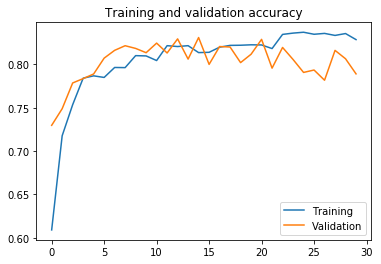

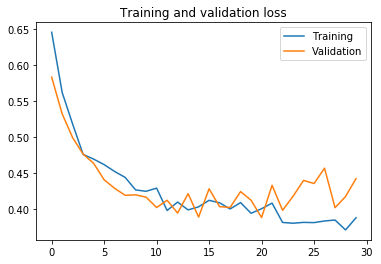

In [27]:
plot_training(history)

# Inception-V3 (Re-Training the model on the dataset)

## Setting up the model architecture

In [0]:
predefined_model = InceptionV3(
    input_shape=(100, 100, 3),
    include_top=False,
    weights=None)

## Fitting model on the data

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.3498$ | | $Loss_{val} = 0.4528$ |  |$Accuracy_{train} = 0.8498$ | |  $Accuracy_{val} = 0.7849$

In [0]:
learning_rate = 0.001
steps_per_epoch = 200
epochs = 30
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [30]:
predefined_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc'])


history = predefined_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

Epoch 1/30
200/200 [==============================] - 30s 149ms/step - loss: 0.3583 - acc: 0.8463 - val_loss: 0.4407 - val_acc: 0.7911
Epoch 2/30
200/200 [==============================] - 26s 132ms/step - loss: 0.3712 - acc: 0.8397 - val_loss: 0.4397 - val_acc: 0.7907
Epoch 3/30
200/200 [==============================] - 26s 131ms/step - loss: 0.3725 - acc: 0.8383 - val_loss: 0.4438 - val_acc: 0.7889
Epoch 4/30
200/200 [==============================] - 26s 131ms/step - loss: 0.3580 - acc: 0.8413 - val_loss: 0.4228 - val_acc: 0.8011
Epoch 5/30
200/200 [==============================] - 26s 131ms/step - loss: 0.3762 - acc: 0.8407 - val_loss: 0.4208 - val_acc: 0.8022
Epoch 6/30
200/200 [==============================] - 27s 137ms/step - loss: 0.3669 - acc: 0.8412 - val_loss: 0.4349 - val_acc: 0.7928
Epoch 7/30
200/200 [==============================] - 26s 132ms/step - loss: 0.3715 - acc: 0.8409 - val_loss: 0.4808 - val_acc: 0.7666
Epoch 8/30
200/200 [==============================] - 2

### Visualizing Training

copy the following text to your notebook text block: 
>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.3498$ | | $Loss_{val} = 0.4528$ |  |$Accuracy_{train} = 0.8498$ | |  $Accuracy_{val} = 0.7849$


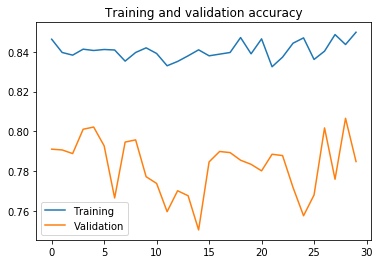

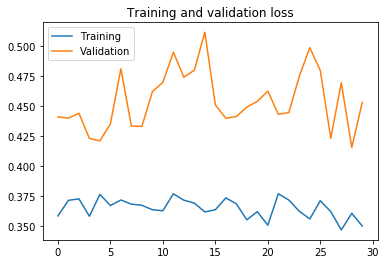

In [32]:
get_training_metrics(
    train_split_percentage=train_percentage,
    history=history,
    optimizer=optimizer,
    learning_rate=learning_rate,
    steps_per_epoch=steps_per_epoch,
    total_epochs=epochs,
    validation_steps=validation_steps,
    batch_size=batch_size,
    print_table_header=True)

plot_training(history)

# VGG-Net

## Creating VGG-Net's architecture

In [34]:
img_input = layers.Input(shape=(100, 100, 3))

x = layers.Conv2D(64, 2, activation='relu')(img_input)
x = layers.Conv2D(64, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 2, activation='relu')(x)
x = layers.Conv2D(128, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 2, activation='relu')(x)
x = layers.Conv2D(256, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(512, 2, activation='relu')(x)
x = layers.Conv2D(512, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(512, 2, activation='relu')(x)
x = layers.Conv2D(512, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

vgg_model = Model(img_input, output)

vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 99, 99, 64)        832       
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 98, 98, 64)        16448     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 48, 48, 128)       32896     
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 47, 47, 128)       65664     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 128)       0   

## Fitting the data on the model

>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6742$ | | $Loss_{val} = 0.6731$ |  |$Accuracy_{train} = 0.5970$ | |  $Accuracy_{val} = 0.5998$

In [0]:
learning_rate = 0.001
steps_per_epoch = 200
epochs = 30
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [37]:
vgg_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc'])


history = vgg_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

Epoch 1/30
200/200 [==============================] - 62s 308ms/step - loss: 0.6898 - acc: 0.5940 - val_loss: 0.6877 - val_acc: 0.5998
Epoch 2/30
200/200 [==============================] - 58s 292ms/step - loss: 0.6874 - acc: 0.5852 - val_loss: 0.6851 - val_acc: 0.5998
Epoch 3/30
200/200 [==============================] - 58s 290ms/step - loss: 0.6847 - acc: 0.5925 - val_loss: 0.6827 - val_acc: 0.5998
Epoch 4/30
200/200 [==============================] - 58s 291ms/step - loss: 0.6824 - acc: 0.5953 - val_loss: 0.6808 - val_acc: 0.5998
Epoch 5/30
200/200 [==============================] - 58s 291ms/step - loss: 0.6812 - acc: 0.5928 - val_loss: 0.6793 - val_acc: 0.5998
Epoch 6/30
200/200 [==============================] - 58s 292ms/step - loss: 0.6797 - acc: 0.5943 - val_loss: 0.6781 - val_acc: 0.5998
Epoch 7/30
200/200 [==============================] - 58s 291ms/step - loss: 0.6772 - acc: 0.6015 - val_loss: 0.6770 - val_acc: 0.5998
Epoch 8/30
200/200 [==============================] - 5

copy the following text to your notebook text block: 
>Split Size | Batch Size | Epochs | Steps Per Epoch | Validation Steps | Optimizer | Learning Rate
>--- | --- | --- | --- | --- | --- | ---
>70-30 | 30 | 30 | 200 | 600 | SGD | 0.001000 
>$Loss_{train} =  0.6742$ | | $Loss_{val} = 0.6731$ |  |$Accuracy_{train} = 0.5970$ | |  $Accuracy_{val} = 0.5998$


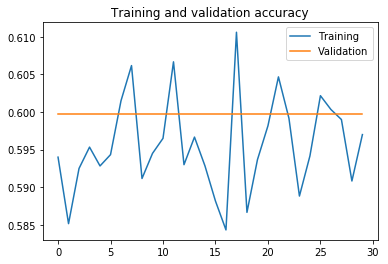

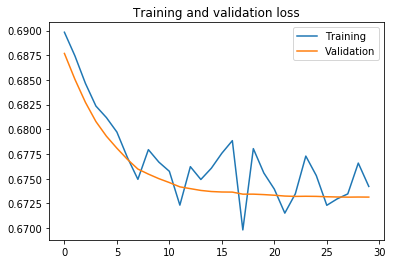

In [38]:
get_training_metrics(
    train_split_percentage=train_percentage,
    history=history,
    optimizer=optimizer,
    learning_rate=learning_rate,
    steps_per_epoch=steps_per_epoch,
    total_epochs=epochs,
    validation_steps=validation_steps,
    batch_size=batch_size,
    print_table_header=True)

plot_training(history)